# 过滤式特征降维
## 低方差特征过滤


In [2]:
from sklearn.feature_selection import VarianceThreshold
import pandas as pd

data = pd.read_csv("./factor_returns.csv")

transfer = VarianceThreshold(threshold=1) # 指定方差阈值为 1，会过滤掉所有方差 < 1 的列
data = transfer.fit_transform(data.iloc[:, 1:10])

print("删除低方差后的数据：\n", data)
print("形状：\n", data.shape)


删除低方差后的数据：
 [[ 5.95720000e+00  1.18180000e+00  8.52525509e+10  8.00800000e-01
   1.49403000e+01  1.21144486e+12  2.07014010e+10  1.08825400e+10]
 [ 7.02890000e+00  1.58800000e+00  8.41133582e+10  1.64630000e+00
   7.86560000e+00  3.00252062e+11  2.93083692e+10  2.37834769e+10]
 [-2.62746100e+02  7.00030000e+00  5.17045520e+08 -5.67800000e-01
  -5.94300000e-01  7.70517753e+08  1.16798290e+07  1.20300800e+07]
 [ 1.64760000e+01  3.71460000e+00  1.96804560e+10  5.60360000e+00
   1.46170000e+01  2.80091592e+10  9.18938688e+09  7.93554273e+09]
 [ 1.25878000e+01  2.56160000e+00  4.17272149e+10  2.87290000e+00
   1.09097000e+01  8.12473804e+10  8.95145349e+09  7.09139799e+09]]
形状：
 (5, 8)


## 皮尔森相关系数 PCC

In [8]:
from scipy.stats import pearsonr
data = pd.read_csv("./factor_returns.csv")
data = data.iloc[:,1:10]
factor = list(data)

for i in range(len(factor)):
    for j in range(i, len(factor)-1):
        print(
            "指标 %s 和指标 %s 之间的相关性大小为： %f " % (factor[i], factor[j+1], pearsonr(data[factor[i]], data[factor[j+1]])[0])
        )

指标 pe_ratio 和指标 pb_ratio 之间的相关性大小为： -0.893030 
指标 pe_ratio 和指标 market_cap 之间的相关性大小为： 0.646984 
指标 pe_ratio 和指标 return_on_asset_net_profit 之间的相关性大小为： 0.656608 
指标 pe_ratio 和指标 du_return_on_equity 之间的相关性大小为： 0.894059 
指标 pe_ratio 和指标 ev 之间的相关性大小为： 0.329688 
指标 pe_ratio 和指标 earnings_per_share 之间的相关性大小为： 0.393708 
指标 pe_ratio 和指标 revenue 之间的相关性大小为： 0.643567 
指标 pe_ratio 和指标 total_expense 之间的相关性大小为： 0.620577 
指标 pb_ratio 和指标 market_cap 之间的相关性大小为： -0.914568 
指标 pb_ratio 和指标 return_on_asset_net_profit 之间的相关性大小为： -0.250734 
指标 pb_ratio 和指标 du_return_on_equity 之间的相关性大小为： -0.756304 
指标 pb_ratio 和指标 ev 之间的相关性大小为： -0.625996 
指标 pb_ratio 和指标 earnings_per_share 之间的相关性大小为： -0.614458 
指标 pb_ratio 和指标 revenue 之间的相关性大小为： -0.848839 
指标 pb_ratio 和指标 total_expense 之间的相关性大小为： -0.752483 
指标 market_cap 和指标 return_on_asset_net_profit 之间的相关性大小为： -0.119383 
指标 market_cap 和指标 du_return_on_equity 之间的相关性大小为： 0.485129 
指标 market_cap 和指标 ev 之间的相关性大小为： 0.741861 
指标 market_cap 和指标 earnings_per_share 之间的相关性大小为： 0.656701

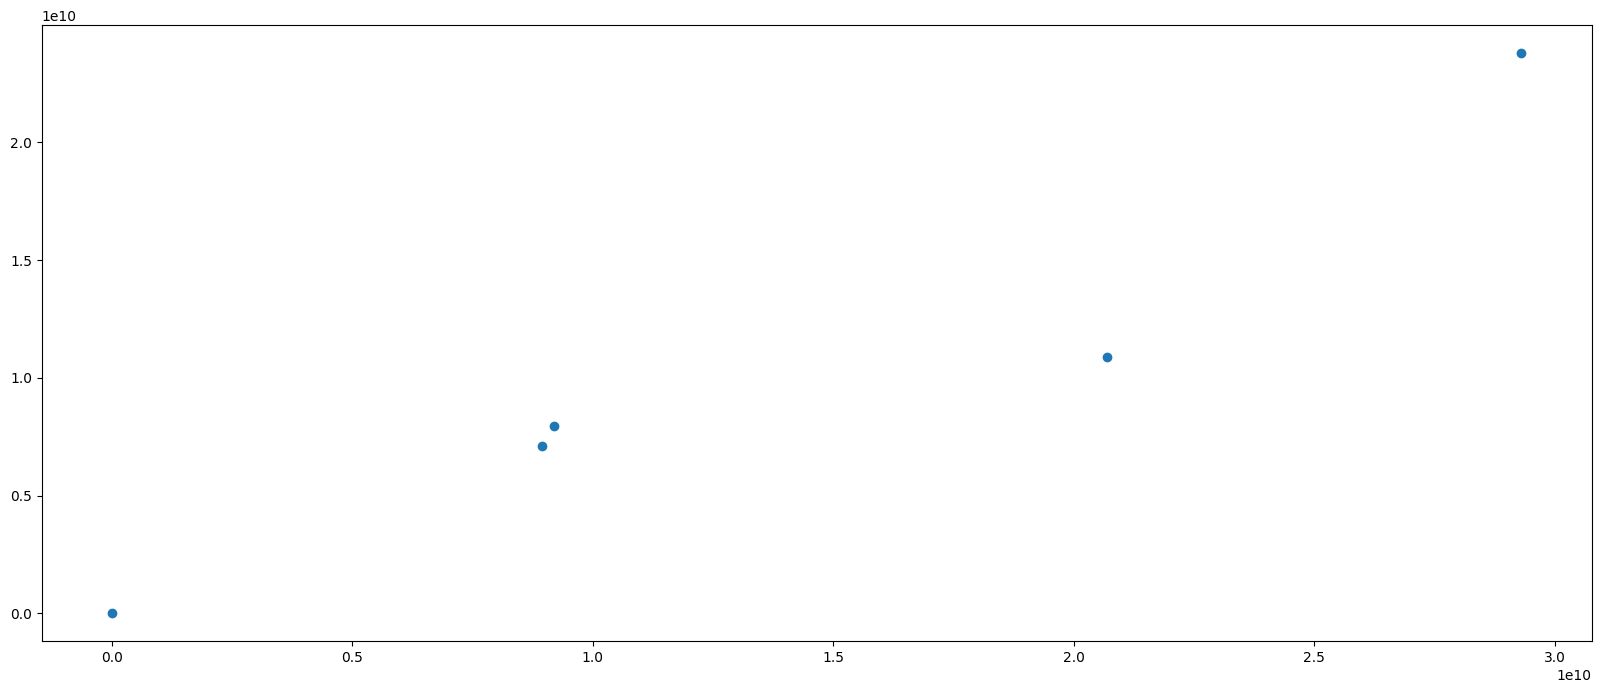

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,8), dpi=100)
plt.scatter(data["revenue"],data["total_expense"])
plt.show()

## PCA 主成分分析

In [18]:
from sklearn.decomposition import PCA

data = [[2,8,4,5], [6,3,0,8], [5,4,9,1]]

# 实例化 PCA， 小数表示保留多少的信息
transfer = PCA(n_components=0.9)

data1 = transfer.fit_transform(data)

print("保留 90% 信息后的数据：\n", data1)

# 实例化 PCA， 整数表示降维到多少维的信息
data = [[2,8,4,5], [6,3,0,8], [5,4,9,1]]
transfer = PCA(n_components=3)

data2 = transfer.fit_transform(data)

print("降维到 3 维的数据：\n", data2)

保留 90% 信息后的数据：
 [[-9.33473422e-16  3.82970843e+00]
 [-5.74456265e+00 -1.91485422e+00]
 [ 5.74456265e+00 -1.91485422e+00]]
降维到 3 维的数据：
 [[-9.33473422e-16  3.82970843e+00  3.58835645e-16]
 [-5.74456265e+00 -1.91485422e+00  3.58835645e-16]
 [ 5.74456265e+00 -1.91485422e+00  3.58835645e-16]]


# 案例学习 Instacart市场篮子分析

In [1]:
import pandas as pd
from sklearn.decomposition import PCA as pca

# 获取数据集
order_products = pd.read_csv("./Instacart/order_products__prior.csv")
products = pd.read_csv("./Instacart/products.csv")
orders = pd.read_csv("./Instacart/orders.csv")
aisles = pd.read_csv("./Instacart/aisles.csv")

# 合并表
# 1.将 order_products 和 orders 以order_id合并
tab1 = pd.merge(order_products, orders, on=["order_id", "order_id"])
# 2.将 tab1 和 products 以product_id合并
tab2 = pd.merge(tab1, products, on=["product_id", "product_id"])
# 3.将 tab2 和 aisles 以aisles_id合并
tab3 = pd.merge(tab2, aisles, on=["aisle_id", "aisle_id"])

tab3


,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_name,aisle_id,department_id,aisle
0,2,33120,1,1,202279,prior,3,5,9,8.0,Organic Egg Whites,86,16,eggs
1,2,28985,2,1,202279,prior,3,5,9,8.0,Michigan Organic Kale,83,4,fresh vegetables
2,2,9327,3,0,202279,prior,3,5,9,8.0,Garlic Powder,104,13,spices seasonings
3,2,45918,4,1,202279,prior,3,5,9,8.0,Coconut Butter,19,13,oils vinegars
4,2,30035,5,0,202279,prior,3,5,9,8.0,Natural Sweetener,17,13,baking ingredients
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32434484,3421083,39678,6,1,25247,prior,24,2,6,21.0,Free & Clear Natural Dishwasher Detergent,74,17,dish detergents
32434485,3421083,11352,7,0,25247,prior,24,2,6,21.0,Organic Mini Sandwich Crackers Peanut Butter,78,19,crackers
32434486,3421083,4600,8,0,25247,prior,24,2,6,21.0,All Natural French Toast Sticks,52,1,frozen breakfast
32434487,3421083,24852,9,1,25247,prior,24,2,6,21.0,Banana,24,4,fresh fruits


In [2]:
tab3.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_name,aisle_id,department_id,aisle
0,2,33120,1,1,202279,prior,3,5,9,8.0,Organic Egg Whites,86,16,eggs
1,2,28985,2,1,202279,prior,3,5,9,8.0,Michigan Organic Kale,83,4,fresh vegetables
2,2,9327,3,0,202279,prior,3,5,9,8.0,Garlic Powder,104,13,spices seasonings
3,2,45918,4,1,202279,prior,3,5,9,8.0,Coconut Butter,19,13,oils vinegars
4,2,30035,5,0,202279,prior,3,5,9,8.0,Natural Sweetener,17,13,baking ingredients


In [3]:
# 计算交叉表的目的：获取每一个用户 user_id，对于各种具体商品的购买次数
table = pd.crosstab(tab3["user_id"],tab3["aisle"])

table.head()

aisle,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,spreads,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt
user_id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,0,3,0,0,0,0,2,0,0,0,...,3,1,1,0,0,0,0,2,0,42
3,0,0,0,0,0,0,0,0,0,0,...,4,1,0,0,0,0,0,2,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
5,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3


In [6]:
transfer = pca(n_components=0.95)

data = transfer.fit_transform(table)

In [7]:
print(data.shape)

(206209, 44)


['foo' 'foo' 'foo' 'foo' 'bar' 'bar' 'bar' 'bar' 'foo' 'foo' 'foo'] ['one' 'one' 'one' 'two' 'one' 'one' 'one' 'two' 'two' 'two' 'one'] ['dull' 'dull' 'shiny' 'dull' 'dull' 'shiny' 'shiny' 'dull' 'shiny'
 'shiny' 'shiny']


col_0,one,two
row_0,,
bar,3,1
foo,4,3
